# Cold gas phase

In [1]:
import os
from PIL import Image as Im
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


Запишем формулы (20) и (26), которыми мы будем пользоваться [из статьи](https://arxiv.org/pdf/0810.2556.pdf)

$$ \Sigma_{SO_4} = \dfrac{6.1}{M_{\odot} pc^{-2}} f_g^{0.3}\left(\dfrac{Z}{0.1 Z_{\odot}}\right)^{-0.3} \left(\dfrac{I}{10^6 cm^{-2}s^{-1}}\right)^{0.23} $$

$$f_g = \dfrac{\Sigma_{gas}}{\Sigma_{gas}+\Sigma_{star}}$$

$$I = 10^6 cm^{-2}s^{-1}\left(\dfrac{\Sigma_{SFR}}{5\cdot 10^4 M_{\odot} yr^{-1} pc^{-2}}\right) $$

Если $\Sigma_{gas} > \Sigma_{SO_4}$, то облать гравитационно нестабильна

In [2]:
Sigma_s = np.load('./data/Sigma_s.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
Sigma_SFR = np.load('./data/Sigma_SFR.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [3]:
I = np.zeros(dist_kpc.shape)
I = Sigma_SFR * 5. * 10**10
Z_sun = 0.012
Z = 8.55

In [4]:
cold_phase_const = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase_const[i][j] = Sigma_SO / Sigma_gas  * np.power(Z/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


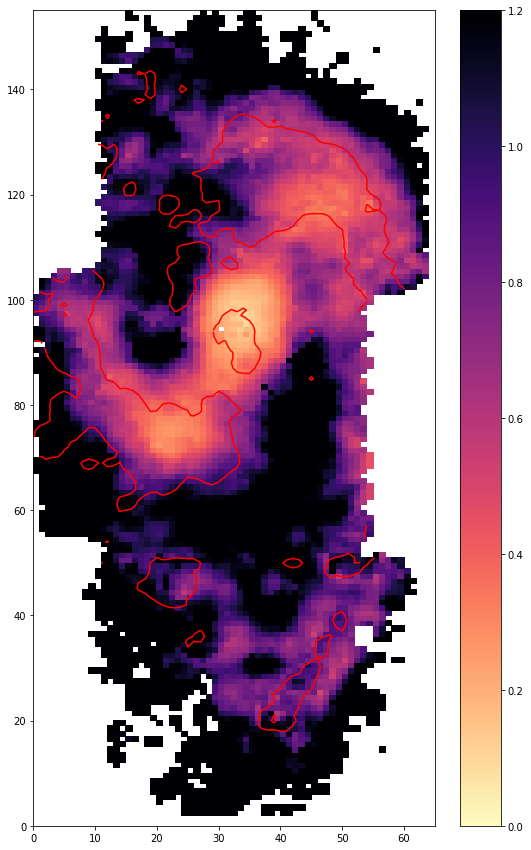

In [5]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, cold_phase_const, cmap='magma_r')
quadmesh.set_clim(vmin=0., vmax = 1.2)
plt.colorbar()

In [6]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase_const[i][j] <= 1.):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0   

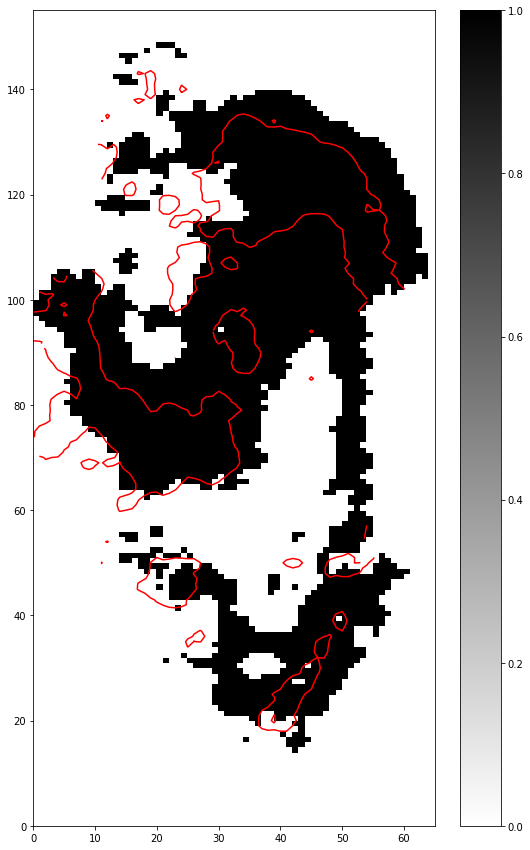

In [7]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

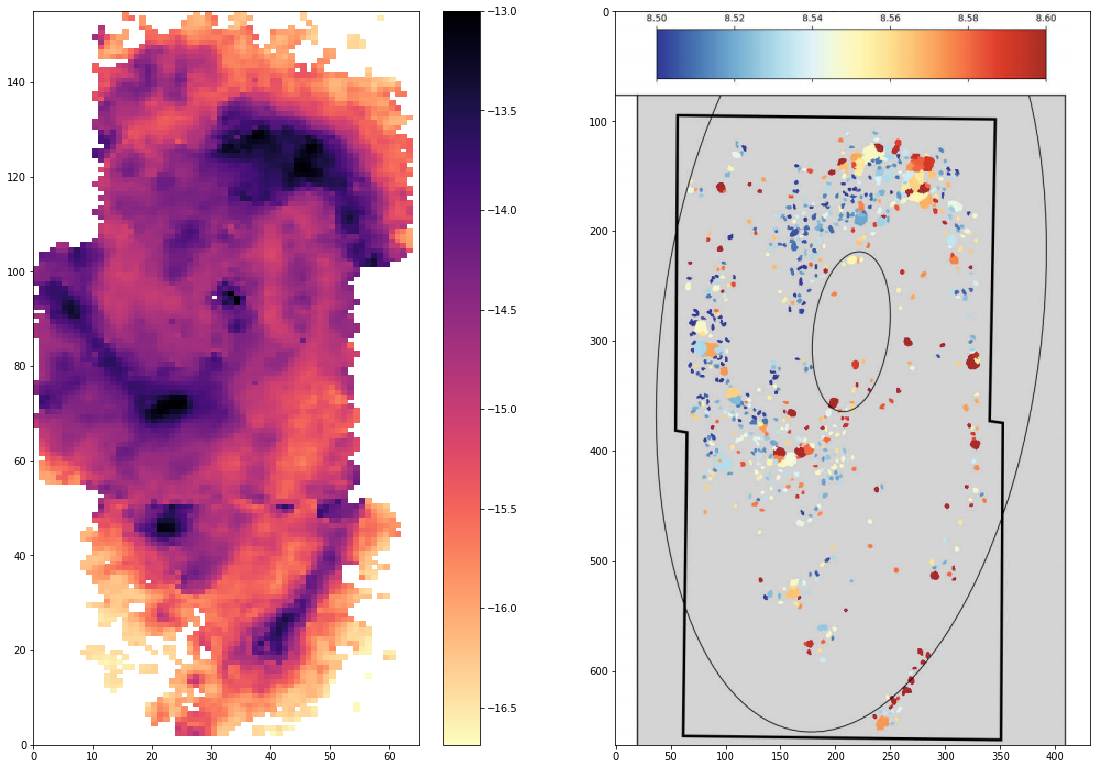

In [13]:
H_alpha = np.load('./data/H_alpha.npy')
plt.figure(figsize=[19, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha), cmap='magma_r')
quadmesh.set_clim(vmax = -13.)
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Im.open('./images/metal.png'))
plt.show()

In [22]:
 Z = np.zeros(dist_kpc.shape)
for i, row in enumerate(H_alpha):
    for j, col in enumerate(H_alpha[0]):
        if (np.log10(H_alpha[i][j])<-14.44):
            Z[i][j] = 0.2
        if (-14.44 <= np.log10(H_alpha[i][j]) < -14.2):
            Z[i][j] = 8.5    
        if (-14.2<= np.log10(H_alpha[i][j]) < -13.8):
            Z[i][j] = 8.52
        if (-13.8 <= np.log10(H_alpha[i][j]) <-13.4):
            Z[i][j] = 8.55    
        if (-13.4 <= np.log10(H_alpha[i][j]) < -13.15):
            Z[i][j] = 8.58
        if (-13.15 <= np.log10(H_alpha[i][j])):
            Z[i][j] = 8.6   
            
Z[90:100,27:38] = 0.2  
Z[46:54,17:26] =0.2 
Z[32:44,45:55] = 0.2 
#
Z[28:37, 25:31] = 8.52
Z[35:40, 25:32] = 0.2
Z[28:31, 29:31] = 0.2
Z[32,31]=0.2
Z[28,25:27] = 0.2
Z[33:35, 25:28] = 0.2
Z[70:77, 0:7] = 0.2
Z[111:116, 29:34] = 0.2
Z[22:27,37:42]=0.2
Z[25:29, 42:45]=0.2
Z[13:17, 37:42] =8.5
Z[18:22, 37:40] = 0.2
Z[13:15, 40:42] = 0.2
Z[100:116, 56:62] = 0.2
Z[113:118, 38:49] = 0.2
Z[118:121, 41:48] = 0.2
Z[92:105, 0:5]= 0.2

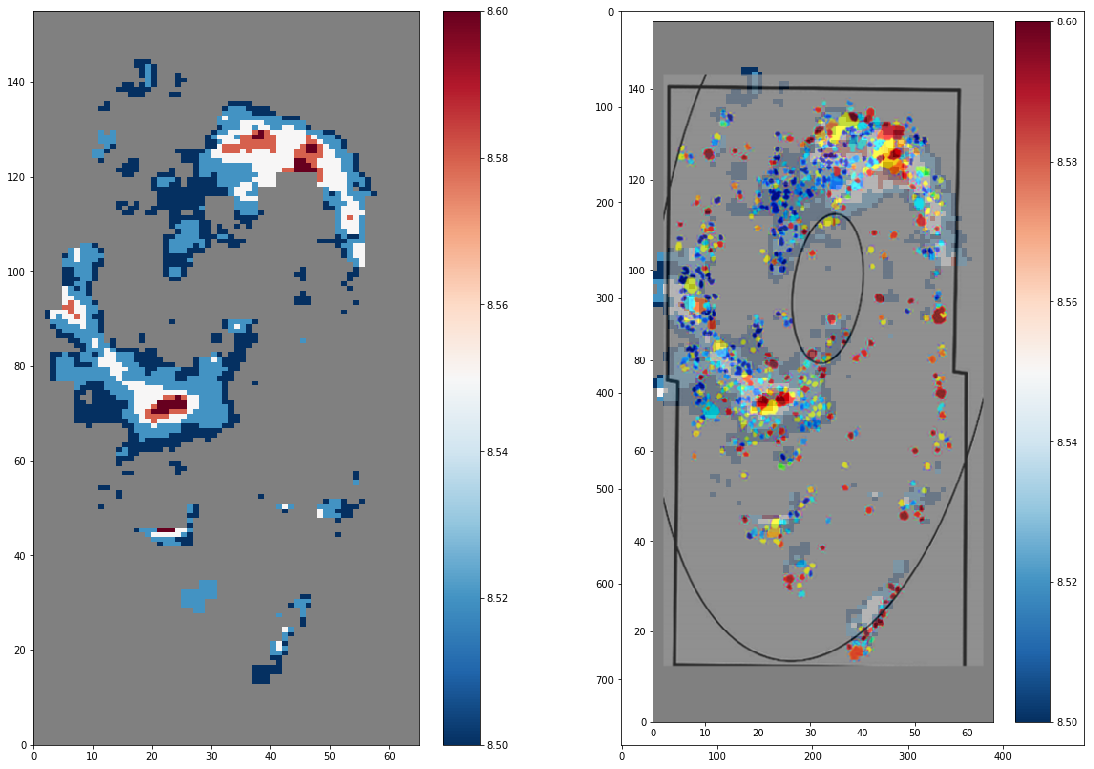

In [23]:
plt.figure(figsize=[19, 13.5])
plt.subplot(1,2,1)
quadmesh = plt.pcolormesh(X, Y, Z,cmap='RdBu_r')
quadmesh.set_clim(vmin=8.5,vmax = 8.6)
quadmesh.cmap.set_under('grey')
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Im.open('./images/metal3.png'))
plt.show()

In [24]:
cold_phase = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36 * (Sigma_HI[i][j]+Sigma_H2[i][j])
        f = Sigma_gas / (Sigma_gas + Sigma_s[i][j])
        Sigma_SO = 6.1 * np.power(f, 0.3,dtype = np.float)  * np.power(I[i][j], 0.23,dtype = np.float)
        cold_phase[i][j] = Sigma_SO / Sigma_gas  * np.power(Z[i][j]/Z_sun/0.1, -0.3,dtype = np.float)   

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in power
  import sys


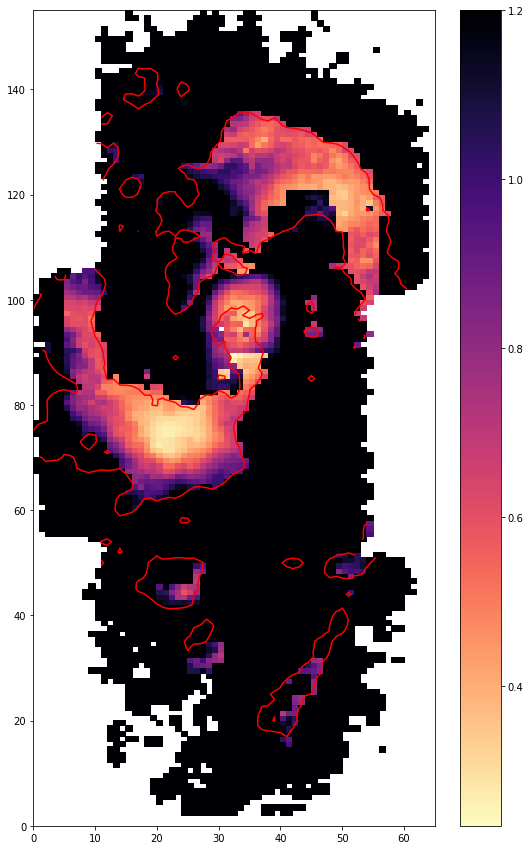

In [25]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.025,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='magma_r')

quadmesh.set_clim( vmax = 1.2)
plt.colorbar()

In [26]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if(0. < cold_phase[i][j] <= 1.):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0   

#### Красной линией обмечены области, в которых у нас есть данные по металличности

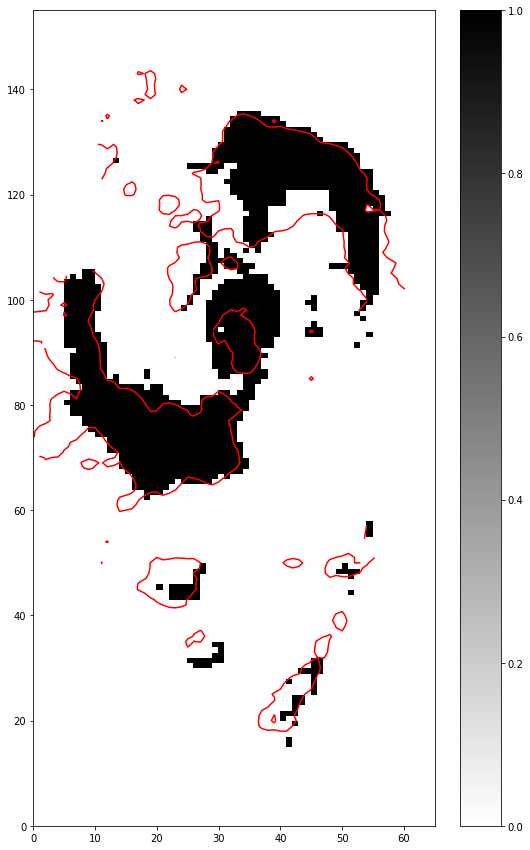

In [27]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.032,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[8.4,], aspect='auto', alpha=1, colors='red') 
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [128]:
np.save('./data/cold_phase.npy', cold_phase)

Text(0.5, 1.0, 'cold_phase(Z = const = 8.5)')

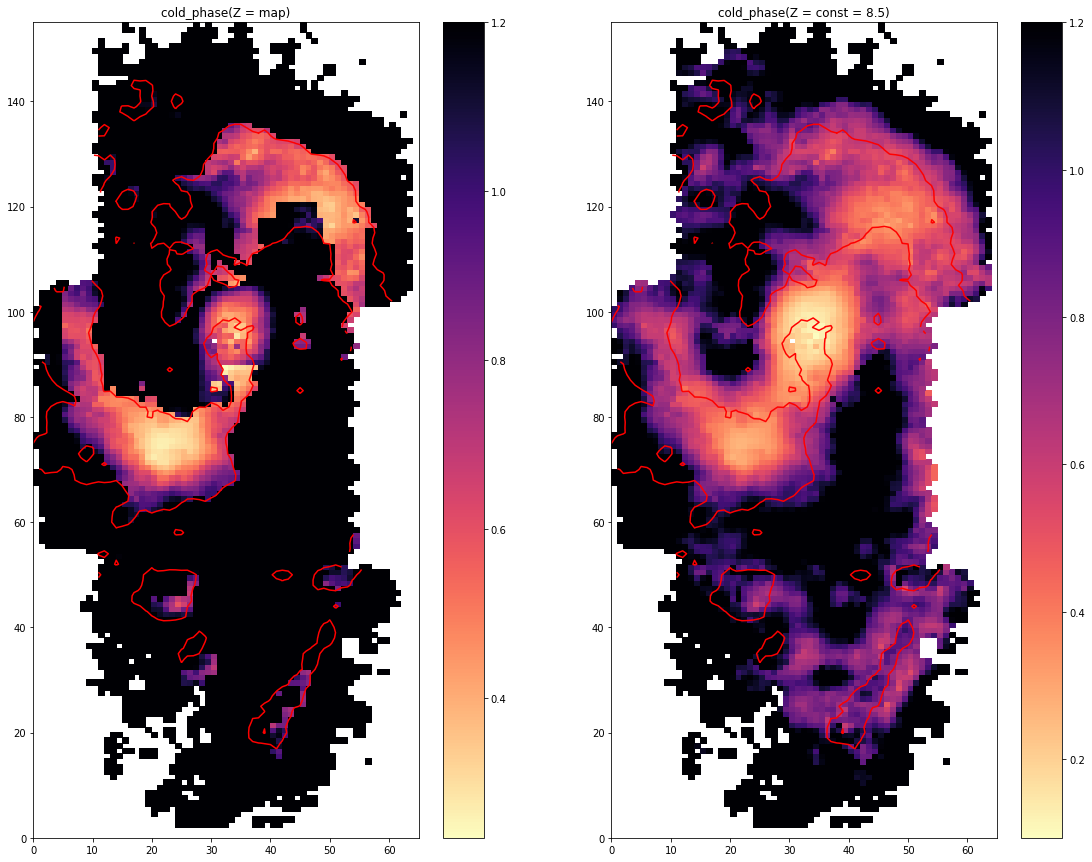

In [28]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[19,15])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.025,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase, cmap='magma_r')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
plt.title('cold_phase(Z = map)')

plt.subplot(1,2,2)
CS = plt.contour(X, Y, Sigma_SFR, levels=[0.025,], aspect='auto', alpha=1, colors='red')
#CS = plt.contour(X, Y, Z, levels=[0,1], aspect='auto', alpha=1, colors='green')
quadmesh = plt.pcolormesh(X, Y, cold_phase_const, cmap='magma_r')
quadmesh.set_clim( vmax = 1.2)
plt.colorbar()
plt.title('cold_phase(Z = const = 8.5)')